# Interpolation
Interpolation is a mathematical technique used to estimate values between two known values. In the context of shapes, interpolation allows us to smoothly transform one shape into another by gradually blending their corresponding points. This process is widely used in computer graphics, animation, and data visualization to create smooth transitions and morphing effects.

### Morphing Example: Circle to Square

This example demonstrates how to morph (interpolate) between a circle and a square shape. The process involves gradually transforming the points of a circle into the corresponding points of a square, creating a smooth animation between the two shapes.

Below, you'll find code and visualizations illustrating this morphing process.


In [1]:
import numpy as np
import matplotlib.pyplot as plt
from ipywidgets import interact, FloatSlider

# Number of points for the shapes
n_points = 100

# Parameter t for the parametric equations
t = np.linspace(0, 2 * np.pi, n_points, endpoint=False)
#np.random.shuffle(t)
# Circle coordinates
circle_x = np.cos(t)
circle_y = np.sin(t)

# Square coordinates (parametric, matching circle points)
points_per_side = n_points // 4
top = np.column_stack((np.linspace(-1, 1, points_per_side), np.ones(points_per_side)))
right = np.column_stack((np.ones(points_per_side), np.linspace(1, -1, points_per_side)))
bottom = np.column_stack((np.linspace(1, -1, points_per_side), -np.ones(points_per_side)))
left = np.column_stack((-np.ones(points_per_side), np.linspace(-1, 1, points_per_side)))

#Combine all sides to form the full square
square_points = np.vstack(( top,  right,bottom, left)) # Change the order of stacking and see the effect.

# Extract x and y coordinates for the square
square_x = square_points[:, 0]
square_y = square_points[:, 1]

def morph_shape(alpha):
    x = (1 - alpha) * circle_x + alpha * square_x
    y = (1 - alpha) * circle_y + alpha * square_y
    plt.figure(figsize=(5, 5))
    plt.plot(x, y, 'o', label=f'alpha={alpha:.2f}')
    plt.axis('equal')
    plt.title('Morphing: Circle to Square')
    plt.legend()
    plt.show()

interact(morph_shape, alpha=FloatSlider(value=0.0, min=0.0, max=1.0, step=0.01));

interactive(children=(FloatSlider(value=0.0, description='alpha', max=1.0, step=0.01), Output()), _dom_classes…

**Task:** Change the order of the stacking of the sides of the square and see the effect. 

Morphing images can be done in the same manner. 

In [2]:
import requests
from PIL import Image
from io import BytesIO
import numpy as np
import ipywidgets as widgets
from IPython.display import display
import matplotlib.pyplot as plt

# URLs of the portrait images
url_dog = "https://unsplash.com/photos/x5oPmHmY3kQ/download?ixid=M3wxMjA3fDB8MXxzZWFyY2h8Mnx8ZG9nJTIwcG9ydHJhaXR8ZW58MHx8fHwxNzU5MDg1MzAxfDA&force=true&w=640"
url_cat = "https://images.pexels.com/photos/34065256/pexels-photo-34065256.jpeg" 
url_face =  "https://images.unsplash.com/photo-1507003211169-0a1dd7228f2d"
url_building= "https://images.pexels.com/photos/10040106/pexels-photo-10040106.jpeg" 

url1=url_face
url2=url_cat
# Function to download and return an image
def download_image(url):
    response = requests.get(url)
    response.raise_for_status()
    image = Image.open(BytesIO(response.content)).convert("RGB")
    return image

# Download both images
img1 = download_image(url1)
img2 = download_image(url2)

# Resize second image to match the first
img2 = img2.resize(img1.size)

# Convert images to numpy arrays
arr1 = np.array(img1, dtype=np.float32)
arr2 = np.array(img2, dtype=np.float32)
# Function to display morphed image based on interpolation factor
def show_morphed_image(alpha):
    blended = (1 - alpha) * arr1 + alpha * arr2
    plt.figure(figsize=(6, 6))
    plt.imshow(np.uint8(blended))
    plt.axis('off')
    plt.title(f"Interpolation α = {alpha:.2f}")
    plt.show()

# Create interactive slider
slider = widgets.FloatSlider(value=0., min=0.0, max=1.0, step=0.05, description='α:', continuous_update=False)
widgets.interact(show_morphed_image, alpha=slider);


interactive(children=(FloatSlider(value=0.0, continuous_update=False, description='α:', max=1.0, step=0.05), O…

# Background theory:
**Weierstrass Approximation Theorem:**  
Every continuous function defined on a closed interval $[a, b]$ can be uniformly approximated as closely as desired by a polynomial function.

**Horner's Method:**  
Horner's method is an efficient algorithm to evaluate polynomials at a given point.  
For a polynomial $ P(x) = a_n x^n + \dots + a_1 x + a_0 $, Horner's form rewrites it as 

$$
P(x) = (\dots((a_n x + a_{n-1}) x + a_{n-2}) \dots x + a_0)
$$  
which reduces the number of multiplications and additions required.


In [5]:
import time

def horner(a, x):
    """Evaluate the polynomial using Horner's rule:
    p(x) = a(0) + a(1)x + ... + a(n-1)x^(n-1)
    """
    n = len(a)
    p = a[-1]
    for k in range(2, n + 1):
        p = p * x + a[-k]
    # Count the number of multiplications and additions
    num_mult = n - 1
    num_add = n - 1
    print(f"Multiplications: {num_mult}, Additions: {num_add}")
    return p

# Example usage:
start_time = time.time()
p=horner([4, 2, -1], 3) # Evaluates −x**2 + 2x + 4
end_time = time.time()
horner_time = end_time - start_time
print(f"Horner's method evaluation: {p}")
print(f"Time taken: {horner_time:.10f} seconds")

#direct evaluation
x = 3
start_time = time.time()
pp=-x**2 + 2*x + 4
end_time = time.time()
direct_time = end_time - start_time
print(f"Direct evaluation: {pp}")
print(f"Time taken: {direct_time:.10f} seconds")
time_diff = direct_time - horner_time
print(f"Time difference (direct - Horner): {time_diff:.10f} seconds")


Multiplications: 2, Additions: 2
Horner's method evaluation: 1
Time taken: 0.0003209114 seconds
Direct evaluation: 1
Time taken: 0.0000410080 seconds
Time difference (direct - Horner): -0.0002799034 seconds


### Lagrange Interpolation Polynomials

**Lagrange interpolation** is a classical method for constructing a polynomial that passes exactly through a given set of data points. Given $n+1$ distinct data points $(x_0, y_0), (x_1, y_1), \ldots, (x_n, y_n)$, the Lagrange interpolating polynomial $P(x)$ of degree at most $n$ is defined as:

$$
P(x) = \sum_{j=0}^{n} y_j \ell_j(x)
$$

where each $\ell_j(x)$ is the **Lagrange basis polynomial**:

$$
\ell_j(x) = \prod_{\substack{0 \leq m \leq n \\ m \neq j}} \frac{x - x_m}{x_j - x_m}
$$

#### Properties

- $\ell_j(x_k) = 1$ if $j = k$, and $0$ otherwise.
- The interpolating polynomial $P(x)$ passes through all the given points: $P(x_j) = y_j$ for all $j$.
- The method is **exact** for polynomials of degree up to $n$.

#### Advantages

- Simple, explicit formula.
- No need to solve a system of equations.

#### Disadvantages

- Computationally expensive for large $n$.
- Susceptible to **Runge’s phenomenon** (oscillations) for high-degree polynomials or unevenly spaced points.

#### Summary Table

| Feature                | Lagrange Interpolation         |
|------------------------|-------------------------------|
| Polynomial Degree      | $n$ (for $n+1$ points)        |
| Passes Through Points? | Yes                           |
| Basis Functions        | Lagrange basis polynomials    |
| Typical Use            | Exact fit for small datasets  |

**In essence:**  
Lagrange interpolation provides a straightforward way to construct a polynomial that exactly fits a set of data points, using a linear combination of specially constructed basis polynomials.

## The $l_j$ functions
The Lagrange basis polynomials, denoted as $l_j(x)$, play a central role in polynomial interpolation. For a given set of $n+1$ distinct nodes $x_0, x_1, \ldots, x_n$, the $j$-th Lagrange basis polynomial is defined as:

$$
l_j(x) = \prod_{\substack{0 \leq m \leq n \\ m \neq j}} \frac{x - x_m}{x_j - x_m}
$$

**Key properties:**
- $l_j(x_k) = 1$ if $k = j$, and $0$ otherwise.
- Each $l_j(x)$ is a polynomial of degree $n$.
- The interpolating polynomial $P(x)$ can be written as a linear combination:
    $$
    P(x) = \sum_{j=0}^n y_j\, l_j(x)
    $$
    where $y_j$ are the function values at the nodes.

**Interpretation:**  
Each $l_j(x)$ "picks out" the value $y_j$ at $x_j$ and is zero at all other nodes. This ensures that the interpolating polynomial passes exactly through all the given data points. The shape and behavior of the $l_j(x)$ polynomials illustrate how each node influences the interpolation at different $x$ values.

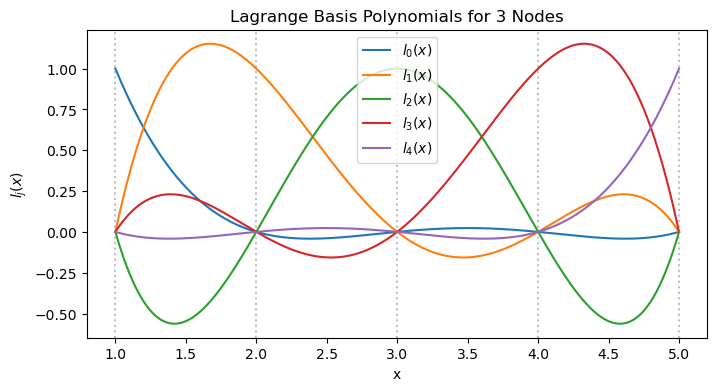

In [6]:
# Plot examples of Lagrange basis polynomials l_j(x) for the 3-point case
def lagrange_basis(x_nodes, j, x):
    """Compute the j-th Lagrange basis polynomial at x."""
    basis = 1
    n = len(x_nodes)
    for m in range(n):
        if m != j:
            basis *= (x - x_nodes[m]) / (x_nodes[j] - x_nodes[m])
    return basis

x_nodes=[1, 2, 3, 4, 5]
x_values = np.linspace(1, 5, 400)
plt.figure(figsize=(8, 4))
for j in range(len(x_nodes)):
    l_j = [lagrange_basis(x_nodes, j, xi) for xi in x_values]
    plt.plot(x_values, l_j, label=f'$l_{j}(x)$')
for node in x_nodes:
    plt.axvline(node, color='gray', linestyle=':', alpha=0.5, linewidth=1.5)
plt.xlabel('x')
plt.ylabel('$l_j(x)$')
plt.title('Lagrange Basis Polynomials for 3 Nodes')
plt.legend()
plt.grid(False)
plt.show()

**Tasks:** 

- The figure only show the $x$-interval of the nodes. What happens outside of that interval?
- The figure has equidistant nodes. Can you define nodes that are not equidistant?

### Example 2 p 194
Consider the function $f(x) = \sqrt{x}$ at the points $x = 1, 2, 3$.  
We want to construct the interpolating polynomial that passes through the points:

| $x$ | $f(x)$   |
|-----|----------|
| 1   | 1.0000   |
| 2   | 1.4142   |
| 3   | 1.7321   |

To construct the interpolating polynomial, we use the Lagrange interpolation formula:

$$
P(x) = \sum_{j=0}^{2} f(x_j) \ell_j(x)
$$

where the Lagrange basis polynomials are:

- $\ell_0(x) = \dfrac{(x-2)(x-3)}{(1-2)(1-3)}=\dfrac{1}{2}(x-2)(x-3)$

- $\ell_1(x) = \dfrac{(x-1)(x-3)}{(2-1)(2-3)}=-(x-1)(x-3)$

- $\ell_2(x) = \dfrac{(x-1)(x-2)}{(3-1)(3-2)}=(x-1)(x-2)$

Plugging in the function values:

- $f(1) = 1.0000$
- $f(2) = 1.4142$
- $f(3) = 1.7321$

So,

$$
\begin{align*}
P(x) =\ & 1.0000 \cdot \dfrac{1}{2} (x-2)(x-3)\\
&- 1.4142 \cdot (x-1)(x-3) \\
&+ 1.7321 \cdot (x-1)(x-2)
\end{align*}
$$

Expanding and simplifying gives the explicit quadratic polynomial that interpolates the points.

In [43]:
def lagrange_interpolating_polynomial(x_points, y_points):
    """
    Returns a function representing the Lagrange interpolating polynomial
    for the given data points (x_points, y_points).
    """
    def P(x):
        total = 0
        n = len(x_points)
        for j in range(n):
            # Compute the j-th Lagrange basis polynomial
            lj = 1
            for m in range(n):
                if m != j:
                    lj *= (x - x_points[m]) / (x_points[j] - x_points[m])
            total += y_points[j] * lj
        return total
    return P

In [36]:
for m in range(10):
    print(m)

0
1
2
3
4
5
6
7
8
9


In [17]:
p=lagrange_interpolating_polynomial([1, 2, 3], [np.sqrt(1), np.sqrt(2), np.sqrt(3)])
type(p)

function

In [9]:
x = 1.2 # Try the nodes 1, 2, 3 and see that p(x) = sqrt(x)
p(x) - np.sqrt(x)

np.float64(-0.004892297161527948)

To add another point x=1.2, f(1.2)=$\sqrt{1.2}$ we need to make a new function


In [10]:
p1=lagrange_interpolating_polynomial([1, 1.2, 2, 3], [np.sqrt(1), np.sqrt(1.2), np.sqrt(2), np.sqrt(3)])
p1(x) - np.sqrt(x)

np.float64(0.0)

**Tasks** Look at the error out side of the data points, for instance x=4. 

Let's plot the results. 

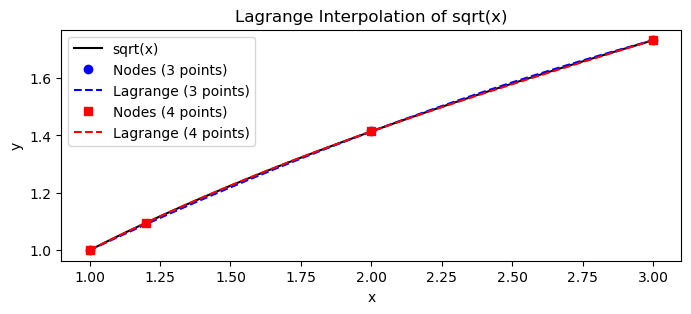

In [18]:
x = np.linspace(1, 3, 400)
plt.figure(figsize=(8, 3))
# Plot the true function
plt.plot(x, np.sqrt(x), label='sqrt(x)', color='black')
# Plot the nodes for 3-point interpolation
x_nodes_3 = [1, 2, 3]
y_nodes_3 = np.sqrt(x_nodes_3)
p3=lagrange_interpolating_polynomial(x_nodes_3, y_nodes_3)
plt.plot(x_nodes_3, y_nodes_3, 'o', label='Nodes (3 points)', color='blue')
# Plot the 3-point interpolation
plt.plot(x, p(x), label='Lagrange (3 points)', color='blue', linestyle='--')
# Plot the nodes for 4-point interpolation
x_nodes_4 = [1, 1.2, 2, 3]
y_nodes_4 = np.sqrt(x_nodes_4)
p4 = lagrange_interpolating_polynomial(x_nodes_4, y_nodes_4)
plt.plot(x_nodes_4, y_nodes_4, 's', label='Nodes (4 points)', color='red')
# Plot the 4-point interpolation
plt.plot(x, p4(x), label='Lagrange (4 points)', color='red', linestyle='--')
plt.xlabel('x')
plt.ylabel('y')
plt.title('Lagrange Interpolation of sqrt(x)')
plt.legend()
plt.show()

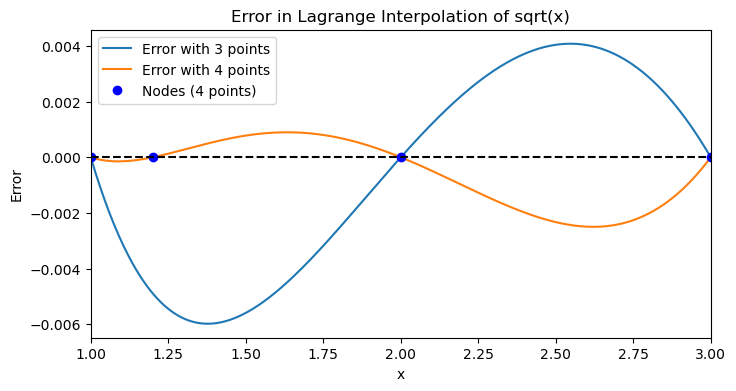

In [21]:
x = np.linspace(1, 3, 400)
plt.figure(figsize=(8, 4))
plt.plot(x, p3(x) - np.sqrt(x), label='Error with 3 points')
plt.plot(x, p4(x) - np.sqrt(x), label='Error with 4 points')
plt.plot(x_nodes_4, [0]*len(x_nodes_4), 'o', label='Nodes (4 points)', color='blue')
plt.axhline(0, color='black', linestyle='--')
plt.xlabel('x')
plt.ylabel('Error')
plt.title('Error in Lagrange Interpolation of sqrt(x)')
plt.xlim(1, 3)
plt.legend();


**Tasks** Extend the x interval beyond the interval $x\in [1,3]$. 

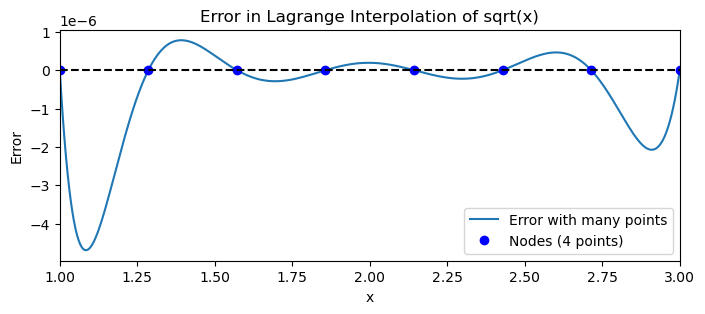

In [27]:
x_nodes_m = np.linspace(1, 3, 8)
y_nodes_m = np.sqrt(x_nodes_m)
pm = lagrange_interpolating_polynomial(x_nodes_m, y_nodes_m)
x = np.linspace(1, 3, 400)
plt.figure(figsize=(8, 3))
plt.plot(x, pm(x) - np.sqrt(x), label='Error with many points')
plt.plot(x_nodes_m, [0]*len(x_nodes_m), 'o', label='Nodes (4 points)', color='blue')
plt.axhline(0, color='black', linestyle='--')
plt.xlabel('x')
plt.ylabel('Error')
plt.title('Error in Lagrange Interpolation of sqrt(x)')
plt.xlim(1, 3)
plt.legend();

### Reproducing figure 6.1
Plot $L(x)=(x-1)(x-1.5)(x-2)(x-2.5)(x-3)$ and check the behaviour outside of $x\in [1,3]$. 

The nodes for this interpolation are $x = 1,\, 1.5,\, 2,\, 2.5,\, 3$. These are the points where the polynomial $L(x)$ is zero, and they define the interval of interest for the interpolation. The behavior of $L(x)$ is well-behaved within the interval $[1, 3]$, but outside this interval, the polynomial can grow rapidly in magnitude and oscillate, illustrating the typical issues of high-degree polynomial interpolation at equidistant nodes. This is closely related to Runge's phenomenon, where interpolation error increases dramatically near the endpoints and outside the range of the nodes.


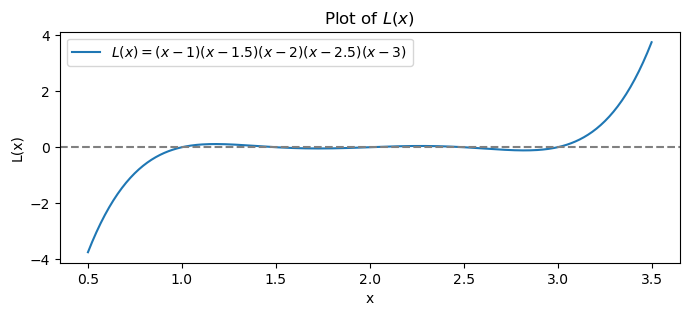

In [22]:
L = lambda x: (x - 1) * (x - 1.5) * (x - 2) * (x - 2.5) * (x - 3)
x_L = np.linspace(0.5, 3.5, 400) # Try (1,3) and (0,4)
plt.figure(figsize=(8, 3))
plt.plot(x_L, L(x_L), label=r'$L(x)=(x-1)(x-1.5)(x-2)(x-2.5)(x-3)$')
plt.xlabel('x')
plt.ylabel('L(x)')
plt.title('Plot of $L(x)$')
plt.axhline(0, color='gray', linestyle='--')
plt.legend()
plt.show()

**Task:** Zoom in on $x\in [1,3]$.

### Example: Newton’s Interpolation for Runge’s Function

Runge’s function is defined as:

$$
f(x) = \frac{1}{1 + x^2}
$$

Let's interpolate this function using Newton's divided differences with equidistant nodes and compare the interpolation to the true function.


In [42]:
from ipywidgets import interact, IntSlider

# Define Runge's function
def runge(x):
    return 1 / (1 + x**2)

# Choose equidistant nodes
def plot_runge_interpolation(num_nodes):
    x_nodes = np.linspace(-5, 5, num_nodes)
    y_nodes = runge(x_nodes)
    p_runge = lagrange_interpolating_polynomial(x_nodes, y_nodes)
    x = np.linspace(-5, 5, 400)
    plt.figure(figsize=(10, 5))
    plt.plot(x, runge(x), label="Runge's Function", color='black')
    plt.plot(x, p_runge(x), label=f'Lagrange Interpolation ({num_nodes} points)', linestyle='--', color='red')
    plt.scatter(x_nodes, y_nodes, color='blue', zorder=5, label='Interpolation Nodes')
    plt.xlabel('x')
    plt.ylabel('y')
    plt.title("Runge's Function and Its Lagrange Interpolation")
    plt.legend()
    plt.show()

interact(plot_runge_interpolation, num_nodes=IntSlider(value=2, min=2, max=20, step=1, description='Nodes'));


interactive(children=(IntSlider(value=2, description='Nodes', max=20, min=2), Output()), _dom_classes=('widget…

## Difference Representation


Difference representation such as Newton's divided differences
is a good approach to interpolation for several reasons:

- **Efficiency for Adding Points:** When a new data point is added, you do not need to recompute the entire polynomial from scratch. You can update the divided difference table incrementally.
- **Numerical Stability:** Newton's form is generally more numerically stable than the standard Lagrange form, especially for large datasets.
- **Computational Simplicity:** The polynomial can be evaluated efficiently using nested multiplication (Horner's method).
- **Flexibility:** The method works well for both evenly and unevenly spaced data points.

In summary, difference representation makes polynomial interpolation more efficient, flexible, and numerically robust, especially when working with many or changing data points.


### Example: Newton's Divided Differences

Given the data points:

| $k$ | $x_k$ | $f(x_k)$ |
|-----|-------|----------|
| 0   | 2     | 4        |
| 1   | 3     | 2        |
| 2   | 5     | 1        |

Let's compute the divided difference table and write the Newton interpolating polynomial.


- Zeroth order (function values):
    - $f[x_0] = f(2) = 4$
    - $f[x_1] = f(3) = 2$
    - $f[x_2] = f(5) = 1$

- First order:
    - $f[x_0, x_1] = \dfrac{f[x_1] - f[x_0]}{x_1 - x_0} = \dfrac{2 - 4}{3 - 2} = -2$
    
    - $f[x_1, x_2] = \dfrac{f[x_2] - f[x_1]}{x_2 - x_1} = \dfrac{1 - 2}{5 - 3} = -0.5$

- Second order:
    - $f[x_0, x_1, x_2] = \dfrac{f[x_1, x_2] - f[x_0, x_1]}{x_2 - x_0} = \dfrac{-0.5 - (-2)}{5 - 2} = \dfrac{1.5}{3} = 0.5$




**Example 5: Newton’s Divided Difference Interpolation for $\sqrt{0.3}$ and $\sqrt{1.1}$**

Given data:

| $x$   | $0.2$   | $0.6$   | $1.2$   | $1.5$   |
|-------|---------|---------|---------|---------|
| $\sqrt{x}$ | $0.4472$ | $0.7746$ | $1.0954$ | $1.2247$ |

We want to estimate $\sqrt{0.3}$ and $\sqrt{1.1}$ using Newton’s divided difference formula.

**Step 1: Prepare the data**

Let  
$x_{\text{data}} = [0.2, 0.6, 1.2, 1.5]$  
$y_{\text{data}} = [0.4472, 0.7746, 1.0954, 1.2247]$

**Step 2: Compute the divided difference table and interpolate**


In [45]:


# Given data
x_data = np.array([0.2, 0.6, 1.2, 1.5])
y_data = np.array([0.4472, 0.7746, 1.0954, 1.2247])

def newton_divided_diff(x, y):
    n = len(x)
    coef = np.copy(y)
    for j in range(1, n):
        coef[j:n] = (coef[j:n] - coef[j-1:n-1]) / (x[j:n] - x[0:n-j])
    return coef

def newton_poly(coef, x_data, x):
    n = len(coef)
    p = coef[-1]
    for k in range(2, n+1):
        p = coef[-k] + (x - x_data[-k]) * p
    return p

# Compute coefficients
coef = newton_divided_diff(x_data, y_data)

# Estimate sqrt(0.3) and sqrt(1.1)
x_vals = [0.3, 1.1]
estimates = [newton_poly(coef, x_data, xv) for xv in x_vals]
print(f"Estimated sqrt(0.3): {estimates[0]:.6f}")
print(f"Estimated sqrt(1.1): {estimates[1]:.6f}")

import math
print(f"Actual sqrt(0.3): {math.sqrt(0.3):.6f}")
print(f"Actual sqrt(1.1): {math.sqrt(1.1):.6f}")
print(f"error sqrt(0.3): {estimates[0] - math.sqrt(0.3):.6f}")
print(f"error sqrt(1.1): {estimates[1] - math.sqrt(1.1):.6f}")




Estimated sqrt(0.3): 0.541068
Estimated sqrt(1.1): 1.050287
Actual sqrt(0.3): 0.547723
Actual sqrt(1.1): 1.048809
error sqrt(0.3): -0.006655
error sqrt(1.1): 0.001478


In [46]:
# Compute divided differences table for x_data and y_data
def divided_diff_table(x, y):
    n = len(x)
    table = np.zeros((n, n))
    table[:,0] = y
    for j in range(1, n):
        for i in range(n-j):
            table[i,j] = (table[i+1,j-1] - table[i,j-1]) / (x[i+j] - x[i])
    return table

table = divided_diff_table(x_data, y_data)
# Format the table for display
rows = []
for k in range(len(x_data)):
    row = [
        k,
        x_data[k],
        f"{table[k,0]:.4f}",
        f"{table[k,1]:.4f}" if k < len(x_data)-1 else "",
        f"{table[k,2]:.4f}" if k < len(x_data)-2 else "",
        f"{table[k,3]:.4f}" if k < len(x_data)-3 else "",
    ]
    rows.append(row)

import pandas as pd
df_table = pd.DataFrame(rows, columns=["k", "x_k", "f[xk]", "f[xk,xk+1]", "f[xk,xk+1,xk+2]", "f[xk,xk+1,xk+2,xk+3]"])
print(df_table.to_markdown(index=False))


|   k |   x_k |   f[xk] | f[xk,xk+1]   | f[xk,xk+1,xk+2]   | f[xk,xk+1,xk+2,xk+3]   |
|----:|------:|--------:|:-------------|:------------------|:-----------------------|
|   0 |   0.2 |  0.4472 | 0.8185       | -0.2838           | 0.1297                 |
|   1 |   0.6 |  0.7746 | 0.5347       | -0.1152           |                        |
|   2 |   1.2 |  1.0954 | 0.4310       |                   |                        |
|   3 |   1.5 |  1.2247 |              |                   |                        |


In [47]:
# Reorder x_data and y_data so that the points closest to x=1.1 come first
x_target = 1.1
indices = np.argsort(np.abs(x_data - x_target))
x_data_sorted = x_data[indices]
y_data_sorted = y_data[indices]

# Compute divided differences table for sorted data
table_sorted = divided_diff_table(x_data_sorted, y_data_sorted)
rows_sorted = []
for k in range(len(x_data_sorted)):
    row = [
        k,
        x_data_sorted[k],
        f"{table_sorted[k,0]:.4f}",
        f"{table_sorted[k,1]:.4f}" if k < len(x_data_sorted)-1 else "",
        f"{table_sorted[k,2]:.4f}" if k < len(x_data_sorted)-2 else "",
        f"{table_sorted[k,3]:.4f}" if k < len(x_data_sorted)-3 else "",
    ]
    rows_sorted.append(row)

df_table_sorted = pd.DataFrame(rows_sorted, columns=["k", "x_k", "f[xk]", "f[xk,xk+1]", "f[xk,xk+1,xk+2]", "f[xk,xk+1,xk+2,xk+3]"])
print(df_table_sorted.to_markdown(index=False))

|   k |   x_k |   f[xk] | f[xk,xk+1]   | f[xk,xk+1,xk+2]   | f[xk,xk+1,xk+2,xk+3]   |
|----:|------:|--------:|:-------------|:------------------|:-----------------------|
|   0 |   1.2 |  1.0954 | 0.4310       | -0.1152           | 0.1297                 |
|   1 |   1.5 |  1.2247 | 0.5001       | -0.2449           |                        |
|   2 |   0.6 |  0.7746 | 0.8185       |                   |                        |
|   3 |   0.2 |  0.4472 |              |                   |                        |


Sorting the data points. Will that improve the result?

In [48]:
x_target = 1.1
indices = np.argsort(np.abs(x_data - x_target))
print(f"distances to x={x_target}:", np.abs(x_data - x_target))
print(f"Indices of closest points:", indices)
print(f"Closest points to x={x_target}:", x_data[indices[:4]], y_data[indices[:4]])

distances to x=1.1: [0.9 0.5 0.1 0.4]
Indices of closest points: [2 3 1 0]
Closest points to x=1.1: [1.2 1.5 0.6 0.2] [1.0954 1.2247 0.7746 0.4472]


In [49]:
x_data_sorted = x_data[indices]
y_data_sorted = y_data[indices]
coef = newton_divided_diff(x_data, y_data)
estimates=newton_poly(coef, x_data, x_target)
coef_sort = newton_divided_diff(x_data_sorted, y_data_sorted)
estimates_sort = newton_poly(coef_sort, x_data_sorted, x_target)

print(f"Estimated sqrt({x_target}) before sorting: {estimates:.12f}")
print(f"Estimated sqrt({x_target}) after sorting: {estimates_sort:.12f}")
print(f"Actual sqrt({x_target}): {math.sqrt(x_target):.12f}")
print(f"error before sorting: {estimates - math.sqrt(x_target):.12f}")
print(f"error after sorting: {estimates_sort - math.sqrt(x_target):.12f}")

Estimated sqrt(1.1) before sorting: 1.050287179487
Estimated sqrt(1.1) after sorting: 1.050287179487
Actual sqrt(1.1): 1.048808848170
error before sorting: 0.001478331317
error after sorting: 0.001478331317


In [52]:
import numpy as np
def ddiff1(xdat, ydat, x):
    """ Function for computing Newton's divided difference formula using nearest data points in 
    'xdat', 'ydat' to elements of 'x' first. """
    N = x.size
    M = xdat.size
    D = np.zeros((M, M))
    y = np.zeros(N)
    for k in range(N):
        # Sort contents of input data arrays
        xtst = x[k]
        ind = np.argsort(np.abs(xtst - xdat))
        xsort = xdat[ind]
        D[:, 0] = ydat[ind]
        # Begin divided differences
        for j in range(M):
            for i in range(M - j - 1):
                D[i, j + 1] = (D[i + 1, j] - D[i, j]) / (xsort[i + j + 1] - xsort[i])
        # End divided differences
        # Compute interpolation
        xdiff = xtst - xsort
        prod = 1  # Holds the product of xdiff
        for i in range(M):
            y[k] = y[k] + prod * D[0, i]
            prod = prod * xdiff[i]
    return y, D

### Runge's example (revisited)


In [ ]:
from ipywidgets import interact, IntSlider



def plot_newton_interp(num_points):
    x_points = np.linspace(-5, 5, num_points)
    y_points = 1 / (1 + x_points**2)
    y_interp, D = ddiff1(x_points, y_points, x_dense)
    plt.figure(figsize=(8, 3))
    plt.plot(x_points, y_points, 'o', label='Interpolation nodes')
    plt.plot(x_dense, y_interp, '--', label='Newton interp.')
    plt.plot(x_dense, y_dense, '-', label='y = 1/(1 + x^2)')
    plt.title('Function y = 1/(1 + x^2)')
    plt.xlabel('x')
    plt.ylabel('y')
    plt.legend()
    plt.show()

interact(plot_newton_interp, num_points=IntSlider(value=7, min=2, max=20, step=1, description='x_points'));

interactive(children=(IntSlider(value=7, description='x_points', max=20, min=2), Output()), _dom_classes=('wid…

In [54]:
# Splines